## **Swimming Pools- Anushka**

The data subset I chose to analyze in order to determine which neighborhood is the best for a penguin to live in is the City of Pittsburgh Pools. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
data = pd.read_csv('PittsburghSwimming.csv', index_col="neighborhood", parse_dates=True)
data.head(28)

,_id,id,name,type,retired,water_source,capacity,image,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,
Bedford Dwellings,1,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,6,5,42003050900,3,5,2,2-5,40.448728,-79.978329
Banksville,2,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,2,20,42003202300,5,20,6,4-9,40.414766,-80.040555
Beechview,3,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,4,19,42003191600,5,19,6,4-28,40.414997,-80.019173
Bloomfield,4,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,7,8,42003080200,2,8,5,3-1,40.461997,-79.953313
Hazelwood,5,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,5,15,42003562300,3,15,4,2-13,40.405073,-79.936899
Troy Hill,6,168387727,Cowley Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,1,24,42003240600,1,24,1,1-2,40.458746,-79.988369
East Hills,7,1569871328,East Hills Spray Park,Spray Park,NaN,Wilkinsburg Penn,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,9,13,42003130600,2,13,5,3-19,40.453099,-79.871039
Highland Park,8,1475037865,Highland - Children,Pool,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,7,11,42003980100,2,11,5,3-9,40.482019,-79.911283
Highland Park,9,5446687,Highland - Main,Pool,NaN,Pittsburgh Water and Sewer Authority,560242.0,https://tools.wprdc.org/images/pittsburgh/pool...,7,11,42003980100,2,11,5,3-9,40.482178,-79.910931


I have read in the CSV file, made the indexed collumn "neighborhoods" in order to display each neighborhood's data, and revealed all the neighborhood's data. 

/opt/tljh/user/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f5e093713d0> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


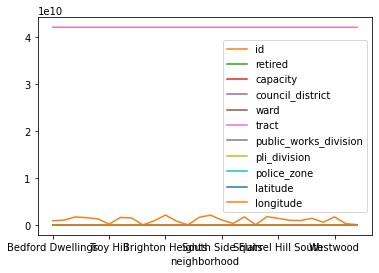

In [7]:
data.plot()

This doesn't look good

In [5]:
data.groupby("capacity")

It looks like the data is too big

In [3]:
pivoted_data = data.pivot_table(index="neighborhood", columns="type", values="capacity")
pivoted_data

type,Pool
neighborhood,
Allegheny Center,271000.0
Banksville,166320.0
Bedford Dwellings,538000.0
Bloomfield,335000.0
Brighton Heights,205800.0
Brookline,417657.0
Carrick,224100.0
Greenfield,195000.0
Highland Park,560242.0


I pivoted the data by keeping the neighborhoods as the index, implementing the type of pools as the column in which the capactiy of each neighborhood's pool is shown.  

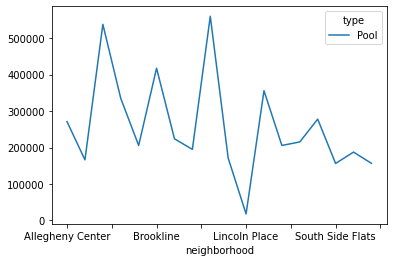

In [6]:
pivoted_data.plot()

In [15]:
pivoted_data.max()

type
Pool    560242.0
dtype: float64

I discovered that the maxium capacity a specific pool has in the dataset is 560,242.  

In [17]:
# Find the index of the row with the maximum capacity
max_capacity = data['capacity'].max()
neighborhood_with_max= data.loc[max_capacity, 'neighborhood']
neighborhood_with_max

KeyError: 560242.0

I was trying to find which neighborhood correlated with the highest capacity pool. 

In [19]:
for capacity in pivoted_data:
    if capacity == 560242.0:
        print('neighborhood')
    else:
        print('error') 

error


This gave me an error because I needed to iterate through the index (neighborhood) and column (pools) of my dataset. 

In [26]:
for neighborhood in pivoted_data.index:
    for capacity in pivoted_data.columns:
        if 560242.0 == pivoted_data.loc[neighborhood, capacity]:
            print("Neighborhood:", neighborhood)
        else:
            break


Neighborhood: Highland Park


My outer *for* loop iterates through the pittsburgh neighborhoods because that is the index in my pivoted dataset. My inner *for* loop iterates through the capacity of the pools because that is the column in my pivoted dataset. My if-else statement obtains the specific neighborhood required from my index and column with the capacity of 560242.0.   

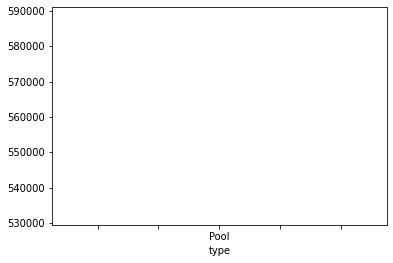

In [28]:
pivoted_data.loc['Highland Park'].plot()